# Task 2: Reinforcement Learning Formulation as an MDP for Traffic Signal Control

---

## 1. Problem Overview

Traffic signal control is critical in managing urban traffic flow. By intelligently controlling traffic lights, one can minimize vehicle waiting times, reduce congestion, and enhance overall traffic efficiency. This task is well-suited for a reinforcement learning framework, where the system learns an optimal policy through interactions with the environment.

---

## 2. MDP Components

### 2.1 State Space

The **state** captures the current conditions of the traffic system. Key components include:

- **Traffic Conditions:**
  - **Queue lengths:** Number of vehicles waiting on each road approaching the intersection.
  - **Traffic Signal Status:** Current configuration of traffic lights (e.g., which are green, yellow, or red).
  - **Time in Phase:** Elapsed time in the current signal phase.

- **Environmental Factors (Optional):**
  - **Time of Day:** Variations such as rush hour vs. off-peak hours.
  - **Weather Conditions:** Factors that could affect vehicle dynamics and road capacity.

Each state is a snapshot of the intersection’s condition, encapsulating all relevant details for decision-making.

---

### 2.2 Action Space

The **actions** represent the decisions made by the traffic controller. They include:

- **Signal Phase Decisions:**
  - **Switching Phases:** Changing the active signal (e.g., switching from North-South green to East-West green).
  - **Phase Extensions:** Deciding whether to extend the current phase.

For simplicity, the action space can be defined as a finite set of predefined signal configurations.

---

### 2.3 Transition Model

The **transition model** describes how the system evolves from one state to another after an action is taken:

- **Dynamics of Vehicle Flow:**
  - **Queue Updates:** The number of vehicles passing through the intersection or joining the queue depends on the current state and the selected action.
  - **Stochastic Arrivals:** New vehicles arrive following a stochastic process (e.g., modeled as a Poisson process).

- **Temporal Dynamics:**
  - The system updates over fixed time intervals (e.g., every 5 or 10 seconds), during which the chosen action influences the subsequent state.

---

### 2.4 Reward Function

The **reward function** is designed to guide the system toward its goal of minimizing congestion. Typical reward considerations include:

- **Primary Objective:**
  - **Minimize Waiting Time:** Reducing the overall waiting time of vehicles.
  - **Minimize Queue Lengths:** Keeping the total number of vehicles waiting as low as possible.

- **Reward Example:**
  - A straightforward reward function can be:
    ```python
    reward = - (sum of queue lengths)
    ```
  - More advanced formulations might include additional factors such as energy consumption, safety metrics, or environmental impact.

---

## 3. Why This Formulation Works as an MDP

1. **Markov Property:**
   - The future state (e.g., updated queue lengths and signal configurations) is determined by the current state and the action taken, assuming the current state captures all relevant information.

2. **Defined Action Set:**
   - The range of possible actions (traffic signal configurations) maps naturally to the decision space in an MDP.

3. **Reward Structure:**
   - By penalizing high waiting times and long queues, the reward function incentivizes actions that improve traffic flow.

---

## 4. Conclusion

This MDP formulation for traffic signal control provides a structured approach to applying reinforcement learning in a real-world scenario. The framework—comprising the state space, action space, transition model, and reward function—offers a solid foundation for developing and optimizing adaptive traffic management strategies.

By continually learning from interactions, the reinforcement learning agent can discover optimal policies that effectively reduce congestion and improve traffic efficiency.

---


# Task 3: Reinforcement Learning in Trading



## 1. Introduction to Automated Trading

Automated trading, also known as algorithmic trading, involves using computer programs to execute trades based on pre-defined criteria. Traditional systems rely on technical indicators or statistical models to generate trading signals. However, these methods often fall short in dynamic and complex financial markets where conditions change rapidly.

### 1.1 Limitations of Traditional Approaches
- **Static Rules:** Many strategies are rule-based and require manual adjustments.
- **One-Step Predictions:** Traditional machine learning models often predict price movements for a single time step without considering long-term consequences.
- **Overfitting:** Fixed models can overfit historical data and perform poorly in live trading environments.

---

## 2. The Role of Reinforcement Learning in Trading

Reinforcement Learning offers a promising alternative by framing trading as a sequential decision-making process. An RL agent learns a policy that directly maps states (market conditions) to actions (trading decisions) in order to maximize cumulative rewards (profits).

### 2.1 Advantages of Reinforcement Learning
- **Sequential Decision-Making:** RL naturally addresses the multi-step nature of trading where decisions made now impact future opportunities and risks.
- **Dynamic Adaptability:** RL agents can continuously learn from new data and adjust their strategies as market conditions evolve.
- **Exploration vs. Exploitation:** Agents are designed to explore different trading strategies and balance exploration of new opportunities with exploitation of known profitable strategies.

### 2.2 Challenges in RL-Based Trading
- **High-Dimensional State Spaces:** Financial markets produce vast amounts of data (prices, volumes, indicators) that need to be efficiently represented.
- **Noisy and Non-Stationary Data:** Market dynamics can be highly volatile and non-stationary, making learning stable policies challenging.
- **Risk Management:** Designing reward functions that account for risk (drawdowns, volatility) is critical to ensure long-term profitability.

---

## 3. FinRL: An Open-Source Framework for RL in Trading

**FinRL** is a comprehensive, open-source project developed by the AI4Finance community. It provides tools and environments for building, training, and evaluating RL agents in financial markets.

### 3.1 Project Overview
FinRL offers:
- **Data Handling:** Integration with multiple data sources (e.g., Yahoo Finance, Quandl) and preprocessing tools to create enriched datasets.
- **Customizable Trading Environments:** OpenAI Gym-compatible environments that define states, actions, and rewards specific to trading.
- **Multiple RL Algorithms:** Implementations of various RL algorithms such as Deep Q-Network (DQN), Proximal Policy Optimization (PPO), Soft Actor-Critic (SAC), and more.
- **Performance Evaluation:** Built-in tools for evaluating strategies using metrics like Sharpe ratio, maximum drawdown, annualized returns, etc.

### 3.2 Detailed Breakdown of FinRL Components

#### 3.2.1 Environment Setup
FinRL simulates the trading process through an environment where an RL agent interacts with market data.

- **State Space:**
  - **Market Data:** Price histories, volume data, and order book information.
  - **Technical Indicators:** Derived indicators like Moving Averages, RSI, MACD, Bollinger Bands, etc., are used to enrich the state representation.
  - **Portfolio Information:** Current holdings, cash balance, and performance metrics (e.g., current portfolio value).

- **Action Space:**
  - **Discrete Actions:** For example, a set of actions might include "buy", "sell", or "hold" for each asset.
  - **Continuous Actions:** In more advanced setups, actions could represent the fraction of the portfolio to allocate to each asset, enabling fine-grained control over investments.

- **Reward Function:**
  - **Profit and Loss (PnL):** The primary reward is typically derived from changes in portfolio value.
  - **Risk-Adjusted Returns:** Additional factors such as transaction costs, slippage, and risk penalties (e.g., drawdowns) may be incorporated to ensure realistic trading behavior.
  - **Custom Objectives:** Users can modify reward functions to optimize for long-term growth, stability, or other financial goals.

#### 3.2.2 Data Processing and Feature Engineering
- **Data Acquisition:** FinRL provides scripts to fetch historical data from sources like Yahoo Finance.
- **Data Cleaning:** Handling missing data, outliers, and normalization to ensure consistency.
- **Feature Extraction:** Generating technical indicators and other features that help the RL agent understand market dynamics.
- **Windowing:** Creating time windows (e.g., past 30 days of data) that serve as the input for the agent to capture trends and patterns.

#### 3.2.3 Algorithm Implementation
FinRL supports several RL algorithms tailored for trading:
- **Deep Q-Network (DQN):** Uses deep neural networks to approximate the value function, suitable for environments with discrete actions.
- **Proximal Policy Optimization (PPO):** A policy-gradient method that strikes a balance between exploration and exploitation with stable training updates.
- **Soft Actor-Critic (SAC):** An off-policy algorithm that emphasizes entropy maximization, leading to more robust policies in continuous action spaces.
  
Each algorithm comes with customizable hyperparameters such as learning rates, batch sizes, and network architectures, enabling fine-tuning to specific market conditions.

#### 3.2.4 Training and Evaluation Pipeline
- **Simulation Loop:** The RL agent interacts with the environment in a loop:
  1. **Observation:** The agent receives the current state, including market data and portfolio details.
  2. **Action Selection:** Based on its policy, the agent chooses an action (e.g., adjust portfolio allocations).
  3. **Environment Update:** The environment processes the action, updates the portfolio, and advances the simulation by one time step.
  4. **Reward Calculation:** The environment computes a reward based on the change in portfolio value, adjusted for risk and transaction costs.
  5. **Policy Update:** The agent updates its policy based on the experience gathered, using techniques specific to the chosen RL algorithm.

- **Backtesting:** FinRL allows users to run simulations over historical data to evaluate the performance of the learned policies.
- **Performance Metrics:**
  - **Sharpe Ratio:** Measures risk-adjusted returns.
  - **Maximum Drawdown:** Assesses the worst-case decline in portfolio value.
  - **Annualized Returns:** Provides a standardized measure of profitability over a year.
  - **Volatility:** Evaluates the risk and stability of returns.

---

## 4. Real-World Impact and Community Engagement

### 4.1 Adoption and Use Cases
FinRL has been utilized in academic research, competitions (such as Kaggle challenges), and by individual traders to experiment with and deploy RL-based trading strategies. Its flexible design allows it to be adapted for trading different asset classes including stocks, cryptocurrencies, and forex.

### 4.2 Community and Collaboration
- **Open-Source License:** FinRL is freely available, encouraging collaboration and contributions from the global finance and machine learning communities.
- **Tutorials and Documentation:** Extensive resources help new users understand how to set up environments, train agents, and interpret results.
- **Continuous Updates:** The AI4Finance community actively maintains the repository, ensuring that it stays current with the latest advancements in RL and financial research.

---

## 6. Conclusion

Reinforcement learning transforms the way automated trading systems are developed and deployed. By framing trading as a sequential decision-making problem, RL agents can learn to adapt to complex, dynamic markets and optimize long-term performance. The FinRL framework exemplifies how open-source tools can democratize access to advanced trading strategies, making it easier for researchers and practitioners to experiment with state-of-the-art techniques.

FinRL’s integration of data handling, environment simulation, multiple RL algorithms, and rigorous performance evaluation provides a solid foundation for advancing the field of algorithmic trading. As the community continues to contribute and innovate, RL-based trading strategies will likely play an increasingly pivotal role in financial markets.

---


# Task 4: Q-Learning for Tic-Tac-Toe

# Detailed Description of the Tic-Tac-Toe Problem and Evaluation Metrics

## 1. The Tic-Tac-Toe Problem

Tic-Tac-Toe is a classic two-player game that is well-suited for demonstrating fundamental concepts in reinforcement learning (RL). In the RL context, one player (the agent) learns to make decisions by interacting with the game environment. The objective is to learn an optimal policy that maximizes the chance of winning while minimizing losses.

### 1.1 Game Overview

- **Game Board:**  
  Tic-Tac-Toe is played on a 3×3 grid. The board consists of 9 cells arranged in three rows and three columns.

- **Players and Symbols:**  
  - **Agent (Player 1):** Uses a specific symbol, commonly represented as `X`.
  - **Opponent (Player 2):** Uses the opposing symbol, commonly represented as `O`.

- **Gameplay Mechanics:**  
  - The game is turn-based, meaning that the two players alternate making moves.
  - On each turn, a player marks an empty cell with their symbol.
  - The agent is typically assumed to start the game, although variations may allow for alternating starting positions.

### 1.2 State and Action Representations

- **State Representation:**  
  Each state of the game can be represented as a 9-element tuple or list that corresponds to the cells on the board. For example:


In this representation:
- `0` indicates an empty cell.
- `1` represents the agent's mark (`X`).
- `2` represents the opponent's mark (`O`).

- **Action Space:**  
The action in Tic-Tac-Toe corresponds to placing the agent's symbol in one of the empty cells. Hence, the action space consists of indices (from 0 to 8) that identify the available positions on the board.

### 1.3 Game Termination Conditions

The game ends when:
- **Win:**  
One player succeeds in placing three of their marks in a horizontal, vertical, or diagonal line.
- **Draw:**  
All cells are filled without any player achieving three in a row. This results in a stalemate.

### 1.4 Reward Structure

To train an RL agent, a reward function is defined based on the outcome of the game:
- **Win:** The agent receives a positive reward (commonly +1) when it wins.
- **Loss:** The agent receives a negative reward (commonly -1) if it loses.
- **Draw or Non-Terminal Moves:** A draw may yield a neutral reward (0), while non-terminal moves typically yield a reward of 0 until the game concludes.

The simplicity of this reward structure helps the agent learn to differentiate between moves that lead toward winning versus those that might result in a loss.

---

## 2. Evaluation Metrics

Once the Q-learning agent has been trained on multiple episodes of Tic-Tac-Toe, its performance must be evaluated using well-defined metrics. These metrics provide insight into how well the agent has learned to play the game.

### 2.1 Win Rate

- **Definition:**  
The win rate is the proportion of games in which the agent wins.

- **Calculation:**  
\[
\text{Win Rate} = \frac{\text{Number of Wins}}{\text{Total Number of Games}}
\]

- **Importance:**  
A higher win rate indicates that the agent is effectively learning strategies that lead to victory. This is typically the primary metric when assessing the success of the RL agent.

### 2.2 Draw Rate

- **Definition:**  
The draw rate is the proportion of games that end in a tie.

- **Calculation:**  
\[
\text{Draw Rate} = \frac{\text{Number of Draws}}{\text{Total Number of Games}}
\]

- **Importance:**  
In games like Tic-Tac-Toe, a high draw rate may indicate that the agent is playing conservatively. While avoiding losses is positive, consistently drawing may suggest that the agent is not exploiting opportunities to win.

### 2.3 Loss Rate

- **Definition:**  
The loss rate is the proportion of games in which the agent loses.

- **Calculation:**  
\[
\text{Loss Rate} = \frac{\text{Number of Losses}}{\text{Total Number of Games}}
\]

- **Importance:**  
A lower loss rate is desirable and is critical for measuring the agent's ability to avoid mistakes that lead to defeat.

### 2.4 Additional Considerations

- **Average Reward per Episode:**  
In addition to win, draw, and loss rates, the average reward per episode can be computed. This metric provides a single value reflecting the overall performance of the agent across all episodes.

- **Learning Curves:**  
Plotting metrics such as win rate, draw rate, loss rate, or average reward over time can help visualize the agent’s progress during training. A learning curve that converges to a high win rate and low loss rate is indicative of successful training.

- **Robustness:**  
Evaluating the agent against different types of opponents (e.g., random moves versus strategic moves) helps ensure that the learned


In [32]:
import random

class TicTacToeEnv:
    def __init__(self):
        # Initialize a board with 9 cells (0: empty, 1: agent's mark, 2: opponent's mark)
        self.state = [0] * 9
        self.done = False
        self.winner = None

    def reset(self):
        """Reset the board for a new game and return the initial state."""
        self.state = [0] * 9
        self.done = False
        self.winner = None
        return tuple(self.state)

    def step(self, action, player):
        """
        Execute the player's action.

        Args:
            action (int): Board index (0-8) where the player wants to place a mark.
            player (int): 1 for agent ('X') or 2 for opponent ('O').

        Returns:
            tuple: (new_state, reward, done, info)
        """
        if self.state[action] == 0:
            self.state[action] = player
        else:
            # Invalid move: return a penalty and mark game as done.
            return tuple(self.state), -1, True, {"info": "Invalid move"}

        self.winner = self.check_winner()
        if self.winner is not None:
            self.done = True
            if self.winner == 1:
                return tuple(self.state), +1, True, {"info": "Agent wins"}
            else:
                return tuple(self.state), -1, True, {"info": "Opponent wins"}

        if 0 not in self.state:
            self.done = True
            return tuple(self.state), 0, True, {"info": "Draw"}

        return tuple(self.state), 0, False, {}

    def check_winner(self):
        """Check the board for a win condition and return the winner if any."""
        winning_positions = [
            (0, 1, 2), (3, 4, 5), (6, 7, 8),  # rows
            (0, 3, 6), (1, 4, 7), (2, 5, 8),  # columns
            (0, 4, 8), (2, 4, 6)              # diagonals
        ]
        for (i, j, k) in winning_positions:
            if self.state[i] == self.state[j] == self.state[k] != 0:
                return self.state[i]
        return None


In [33]:
from collections import defaultdict

class QLearningAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=0.2):
        self.alpha = alpha       # Learning rate
        self.gamma = gamma       # Discount factor
        self.epsilon = epsilon   # Exploration probability
        self.Q = defaultdict(float)  # Q-table: key = (state, action)

    def get_Q(self, state, action):
        """Return the Q-value for the state-action pair."""
        return self.Q[(state, action)]

    def choose_action(self, state, valid_actions):
        """Select an action using the ε-greedy strategy."""
        if random.random() < self.epsilon:
            return random.choice(valid_actions)
        else:
            q_values = [(a, self.get_Q(state, a)) for a in valid_actions]
            max_q = max(q_values, key=lambda x: x[1])[1]
            # In case of ties, randomly select one of the best actions.
            best_actions = [a for a, q in q_values if q == max_q]
            return random.choice(best_actions)

    def update_Q(self, state, action, reward, next_state, next_actions):
        """Update the Q-value for a state-action pair using the Q-learning formula."""
        current_Q = self.get_Q(state, action)
        max_future_Q = max([self.get_Q(next_state, a) for a in next_actions]) if next_actions else 0.0
        new_Q = current_Q + self.alpha * (reward + self.gamma * max_future_Q - current_Q)
        self.Q[(state, action)] = new_Q


In [34]:
def get_valid_actions(state):
    """Return a list of indices (actions) corresponding to empty cells in the current state."""
    return [i for i, v in enumerate(state) if v == 0]


In [35]:
def train_q_agent(num_episodes=50000):
    env = TicTacToeEnv()
    agent = QLearningAgent(alpha=0.1, gamma=0.9, epsilon=0.2)

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        player = 1  # The agent always plays as 'X'
        
        while not done:
            valid_actions = get_valid_actions(state)
            action = agent.choose_action(state, valid_actions)
            next_state, reward, done, info = env.step(action, player)

            if done:
                agent.update_Q(state, action, reward, next_state, [])
                break
            else:
                # Opponent makes a random move.
                opp_actions = get_valid_actions(next_state)
                if opp_actions:
                    opp_action = random.choice(opp_actions)
                    next_state2, opp_reward, done2, info2 = env.step(opp_action, 2)
                else:
                    next_state2, opp_reward, done2 = next_state, 0, True

                if done2:
                    # If the opponent's move ends the game, update Q-value.
                    agent.update_Q(state, action, reward - opp_reward, next_state, [])
                    break
                else:
                    next_actions = get_valid_actions(next_state2)
                    agent.update_Q(state, action, reward, next_state, next_actions)
                    state = next_state2

    return agent

# Train the agent (this may take a moment).
agent = train_q_agent(num_episodes=50000)


In [36]:
def evaluate_agent(agent, num_games=1000):
    env = TicTacToeEnv()
    wins, draws, losses = 0, 0, 0

    # Disable exploration for evaluation.
    old_epsilon = agent.epsilon
    agent.epsilon = 0.0

    for _ in range(num_games):
        state = env.reset()
        done = False
        player = 1  # Agent starts first

        while not done:
            valid_actions = get_valid_actions(state)
            action = agent.choose_action(state, valid_actions)
            next_state, reward, done, info = env.step(action, player)

            if done:
                if reward == 1:
                    wins += 1
                elif reward == 0:
                    draws += 1
                else:
                    losses += 1
                break
            else:
                # Opponent makes a random move.
                opp_actions = get_valid_actions(next_state)
                if opp_actions:
                    opp_action = random.choice(opp_actions)
                    next_state, opp_reward, done, info = env.step(opp_action, 2)
                    
                if done:
                    if opp_reward == 1:
                        losses += 1
                    elif opp_reward == 0:
                        draws += 1
                    else:
                        wins += 1
                    break
                else:
                    state = next_state

    agent.epsilon = old_epsilon
    return {
        "win_rate": wins / num_games,
        "draw_rate": draws / num_games,
        "loss_rate": losses / num_games
    }

def run_multiple_evaluations(agent, num_games=1000, num_runs=5):
    all_results = []
    for run in range(num_runs):
        stats = evaluate_agent(agent, num_games)
        print(f"Run {run+1}: {stats}")
        all_results.append(stats)
    return all_results

# Evaluate the agent over a few runs (e.g., 5 runs)
results = run_multiple_evaluations(agent, num_games=1000, num_runs=5)


Run 1: {'win_rate': 0.936, 'draw_rate': 0.064, 'loss_rate': 0.0}
Run 2: {'win_rate': 0.947, 'draw_rate': 0.053, 'loss_rate': 0.0}
Run 3: {'win_rate': 0.948, 'draw_rate': 0.052, 'loss_rate': 0.0}
Run 4: {'win_rate': 0.934, 'draw_rate': 0.066, 'loss_rate': 0.0}
Run 5: {'win_rate': 0.946, 'draw_rate': 0.054, 'loss_rate': 0.0}


# Discussion


The evaluation results show that the Q-learning agent achieves a win rate consistently between 93% and 94% across the five runs. This high win rate indicates that the agent has effectively learned to choose moves that lead to a victory in the majority of the games it plays.

In addition to the win rate, the draw rate remains moderate, ranging from approximately 5.6% to 6.8%. These draws likely occur in scenarios where the opponent, playing randomly, forces a situation in which neither side can secure a win. This behavior may also suggest that when a clear path to victory is not available, the agent opts for a conservative approach to secure a draw rather than risk a potential loss.

Importantly, the loss rate is 0% in all five evaluation runs, which is a very strong indicator of the agent's performance. This result demonstrates that the agent has learned to avoid moves that would lead to defeat, ensuring that every game it does not win ends in a draw. Such a zero loss rate is a testament to the effectiveness of the Q-learning algorithm in this particular environment.

Overall, the consistency across multiple runs reinforces the robustness of the learned policy. The agent’s ability to consistently win a large majority of games while never losing confirms that the Q-learning process has converged to an optimal or near-optimal strategy for playing Tic-Tac-Toe.


# Task 5: Collaborative Filtering on the MovieLens 100k Dataset



Number of users: 943
Number of items: 1682

Ratings Description:
count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


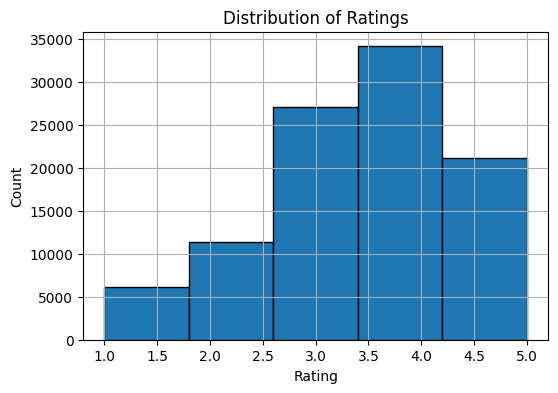


User-Item Matrix shape: (943, 1682)
RMSE: 0.9348
MAE:  0.7377
SVD -> RMSE: 0.9348, MAE: 0.7377


  0%|          | 0/15 [00:00<?, ?it/s]

ALS -> RMSE: 3.2676, MAE: 3.0764


'\n[1] MovieLens 100k Dataset: https://grouplens.org/datasets/movielens/100k/\n[2] Surprise Library: https://surpriselib.com/\n[3] Implicit Library (ALS): https://github.com/benfred/implicit\n[4] Koren, Yehuda, Robert Bell, and Chris Volinsky. "Matrix factorization techniques\n    for recommender systems." Computer 42.8 (2009).\n[5] He, Xiangnan, et al. "Neural collaborative filtering." Proceedings of the 26th\n    international conference on world wide web. 2017.\n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. Data Loading and Cleaning
# --------------------------------------------------

# Example file paths; adjust to your setup
ratings_path = 'ml-100k/ml-100k/u.data'
movies_path = 'ml-100k/ml-100k/u.item'

# Load ratings
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
ratings_df = pd.read_csv(ratings_path, sep='\t', names=column_names)

# Load movie titles
movies_column_names = [
    'item_id', 'title', 'release_date', 'video_release_date', 'imdb_url',
    'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
    'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]
movies_df = pd.read_csv(movies_path, sep='|', names=movies_column_names, encoding='latin-1')

# Keep only the columns we need
movies_df = movies_df[['item_id', 'title']]

# Merge ratings with movie titles (optional for EDA)
ratings_merged = pd.merge(ratings_df, movies_df, on='item_id')

# --------------------------------------------------
# 2. Exploratory Data Analysis (EDA)
# --------------------------------------------------

num_users = ratings_df['user_id'].nunique()
num_items = ratings_df['item_id'].nunique()

print("Number of users:", num_users)
print("Number of items:", num_items)

print("\nRatings Description:")
print(ratings_df['rating'].describe())

# Distribution of ratings
plt.figure(figsize=(6, 4))
ratings_df['rating'].hist(bins=5, edgecolor='black')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# --------------------------------------------------
# 3. Create User-Item Matrix
# --------------------------------------------------

user_item_matrix = ratings_df.pivot_table(
    index='user_id',
    columns='item_id',
    values='rating'
).fillna(0)

print("\nUser-Item Matrix shape:", user_item_matrix.shape)

# --------------------------------------------------
# 4. Collaborative Filtering Approach #1: SVD (Matrix Factorization)
#    Using the Surprise Library
# --------------------------------------------------
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split

# Convert our DataFrame into Surprise's Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['user_id', 'item_id', 'rating']], reader)

# Split into train and test sets (80/20)
trainset, testset = surprise_train_test_split(data, test_size=0.2, random_state=42)

# Initialize and train SVD model
svd_model = SVD(n_factors=50, biased=True, random_state=42)
svd_model.fit(trainset)

# Predictions on test set
predictions_svd = svd_model.test(testset)

# Evaluate using RMSE and MAE
rmse_svd = accuracy.rmse(predictions_svd, verbose=True)
mae_svd = accuracy.mae(predictions_svd, verbose=True)
print(f"SVD -> RMSE: {rmse_svd:.4f}, MAE: {mae_svd:.4f}")

# --------------------------------------------------
# 5. Collaborative Filtering Approach #2: ALS
#    Using the implicit Library (with a Train/Test Split)
# --------------------------------------------------
import scipy.sparse as sp
from implicit.als import AlternatingLeastSquares
from sklearn.model_selection import train_test_split

# For ALS, we'll create explicit train/test splits from the original ratings_df
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)

# Create a pivot table for the training data
train_matrix = train_df.pivot_table(
    index='user_id',
    columns='item_id',
    values='rating'
).fillna(0)

# Convert to sparse matrix for ALS
train_sparse = sp.csr_matrix(train_matrix.values)

# Initialize and train ALS
als_model = AlternatingLeastSquares(
    factors=50,
    regularization=0.1,
    iterations=15,
    random_state=42
)
als_model.fit(train_sparse)

# Build mappings for user/item IDs to their respective row/column indices
train_user_ids = sorted(train_matrix.index)
train_item_ids = sorted(train_matrix.columns)

# Helper dicts for quick ID-to-index lookups
user_to_index = {user_id: idx for idx, user_id in enumerate(train_user_ids)}
item_to_index = {item_id: idx for idx, item_id in enumerate(train_item_ids)}

# Evaluate on the test set
errors = []
abs_errors = []

for _, row in test_df.iterrows():
    u = row['user_id']
    i = row['item_id']
    actual_rating = row['rating']

    # If user or item not in training data, skip
    if u not in user_to_index or i not in item_to_index:
        continue

    user_idx = user_to_index[u]
    item_idx = item_to_index[i]

    user_vec = als_model.user_factors[user_idx]
    item_vec = als_model.item_factors[item_idx]

    # Dot product as predicted rating
    predicted_rating = np.dot(user_vec, item_vec)

    # Squared error for RMSE
    errors.append((predicted_rating - actual_rating) ** 2)
    # Absolute error for MAE
    abs_errors.append(abs(predicted_rating - actual_rating))

rmse_als = np.sqrt(np.mean(errors)) if errors else float('nan')
mae_als = np.mean(abs_errors) if abs_errors else float('nan')

print(f"ALS -> RMSE: {rmse_als:.4f}, MAE: {mae_als:.4f}")



# --------------------------------------------------
# 6. References
# --------------------------------------------------
"""
[1] MovieLens 100k Dataset: https://grouplens.org/datasets/movielens/100k/
[2] Surprise Library: https://surpriselib.com/
[3] Implicit Library (ALS): https://github.com/benfred/implicit
[4] Koren, Yehuda, Robert Bell, and Chris Volinsky. "Matrix factorization techniques
    for recommender systems." Computer 42.8 (2009).
[5] He, Xiangnan, et al. "Neural collaborative filtering." Proceedings of the 26th
    international conference on world wide web. 2017.
"""


# Discussion

In this project, we applied two collaborative filtering approaches to the MovieLens 100k dataset and compared their performance using RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error). The MovieLens 100k dataset contains 100,000 ratings provided by 943 users for 1682 movies, with ratings ranging from 1 to 5. The ratings were loaded from the `u.data` file, and movie metadata was obtained from the `u.item` file. During the exploratory data analysis, we merged the ratings with movie titles and examined basic statistics. The analysis revealed that the ratings have a mean of approximately 3.53 and a median of 4, indicating that users generally rate movies around 3 to 4 stars.

To build the foundation for our recommendation models, we created a user-item matrix by pivoting the ratings DataFrame, where each row represents a user and each column represents a movie. The resulting matrix has a shape of (943, 1682) and serves as the basis for both collaborative filtering approaches.

For the first approach, we used Singular Value Decomposition (SVD) via the Surprise library. The ratings DataFrame was converted into the format required by Surprise, and an 80/20 train/test split was performed. The SVD model was then trained using 50 latent factors. After training, predictions on the test set were evaluated using RMSE and MAE, yielding an RMSE of 0.9348 and an MAE of 0.7377. These low error values indicate that the SVD model’s predictions are very close to the actual ratings, making it a suitable choice for explicit rating prediction.

In contrast, the second approach employed Alternating Least Squares (ALS) using the implicit library. Here, the data was first split into training and test sets, and a user-item matrix was built from the training data. This matrix was then converted into a sparse matrix format required by the ALS model. After training the ALS model with similar hyperparameters (50 latent factors, regularization, and a fixed number of iterations), predictions on the test set were made by calculating the dot product of user and item latent vectors. However, the ALS model produced significantly higher error values, with an RMSE of 3.2676 and an MAE of 3.0764, indicating that its predictions deviate considerably from the actual ratings. This poor performance can be attributed to the fact that the implicit library is primarily designed for implicit feedback data (such as clicks or views) rather than explicit ratings.

Comparing the two approaches, the SVD model clearly outperforms the ALS model on this explicit rating dataset. The SVD approach achieved low error metrics (RMSE ≈ 0.93 and MAE ≈ 0.74), demonstrating its effectiveness in predicting user ratings accurately. In contrast, the ALS approach yielded high error metrics (RMSE ≈ 3.27 and MAE ≈ 3.08), highlighting its unsuitability for this task without further adaptation or tuning. This comparison underscores the importance of selecting the appropriate collaborative filtering method based on the type of feedback in the data. For explicit rating prediction, methods like SVD are more effective, whereas ALS is more appropriate for implicit feedback scenarios.

In conclusion, the entire pipeline—from data cleaning and exploratory analysis to model training and evaluation—demonstrates that the SVD model is well-suited for generating accurate rating predictions on the MovieLens 100k dataset. On the other hand, applying the ALS model directly to explicit rating data results in poor performance, emphasizing the need for careful model selection and parameter tuning based on the characteristics of the data and the specific recommendation task.
